# **CARGAR DATOS E IMPORTAR BIBLIOTECAS NECESARIAS**

In [ ]:
# BIBLIOTECAS NECESARIAS

# Bibliotecas para operaciones numéricas y manejo de datos
import numpy as np  # Operaciones numéricas
import pandas as pd  # Manejo de datos en formato tabular

# División del conjunto de datos y validación cruzada
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# Importar todo el módulo de métricas
import sklearn.metrics

# Métricas de evaluación y reportes
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    roc_curve, auc,
    classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

# Bibliotecas para gráficos
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos estadísticos, con menos código que matplotlib
import plotly.express as px  # Gráficos interactivos con interfaz sencilla y de alto nivel
import plotly.graph_objects as go  # Gráficos interactivos con interfaz más detallada y de bajo nivel
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D  # Para crear la leyenda personalizada

# Herramientas para iteradores
import itertools  # Herramientas funcionales para crear y utilizar iteradores

# Herramientas para preprocesamiento de datos y evaluación de modelos
from sklearn.preprocessing import StandardScaler  # Escalado de características para normalizar datos
from sklearn.model_selection import learning_curve  # Generación de curvas de aprendizaje para evaluar el rendimiento del modelo
from sklearn.model_selection import validation_curve  # Generación de curvas de validación para evaluar el rendimiento del modelo

In [2]:
# Cargar el dataset desde un archivo CSV
trans_fraud = pd.read_csv('C:\\Users\\mmene\\OneDrive\\Escritorio\\RESULTADOS PROYECTO\\DATA\\credit_card_fraud_detection.csv')

In [3]:
trans_fraud.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# **PREPROCESAMIENTO**

In [3]:
# PREPROCESAMIENTO Y ESCALADO DE CARACTERÍSTICAS PARA EL CONJUNTO DE DATOS

# Paso 1: Separar las características (X) de la columna objetivo (y)
X = trans_fraud.drop(['Class'], axis=1)  # Eliminar la columna 'Class' que es la etiqueta objetivo
y = trans_fraud['Class']  # Conservar solo la columna 'Class', que contiene las etiquetas de clase

# Paso 2: Crear un objeto 'StandardScaler' para normalizar las características
scaler = StandardScaler()

# Paso 3: Ajustar el 'scaler' a las características (X) y aplicar la transformación para normalizar
scaled = scaler.fit_transform(X)  # 'fit_transform' ajusta y transforma los datos en un solo paso

# Paso 4: Convertir el array escalado de vuelta a un DataFrame para mantener los nombres de las columnas
X_scaled = pd.DataFrame(scaled, columns=X.columns)

# Paso 5: Unir el DataFrame escalado con la columna 'Class' para reconstruir el conjunto de datos
trans_fraud_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)  # Se resetea el índice de 'y' para que coincida con 'X_scaled'

# Paso 6: Mostrar las primeras filas del conjunto de datos escalado para verificar la transformación
trans_fraud_scaled.head()  # Muestra las primeras filas del DataFrame escalado

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


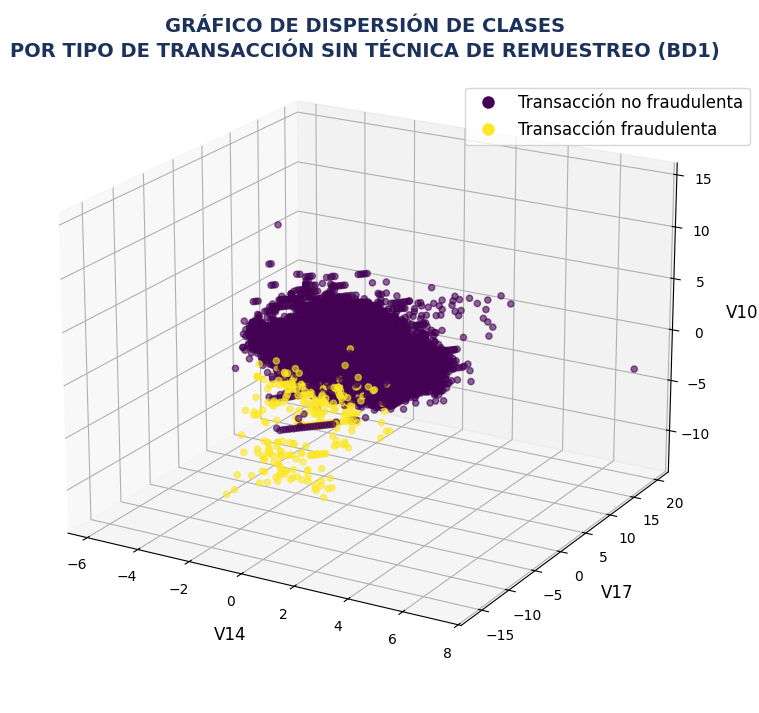

In [8]:
# VISUALIZACIÓN 3D DE LA DISTRIBUCIÓN DE CLASES EN DATOS DE TRANSACCIONES

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(12, 9))  # Tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un eje 3D en la figura

# Usar el colormap 'viridis' para asignar colores a las clases
cmap = plt.cm.viridis  # Cargar el colormap 'viridis', que asigna colores a las clases

# Definir colores específicos para cada clase (clase 0 y clase 1)
# Usamos el color más oscuro para la clase 0 y el amarillo para la clase 1
colors = [cmap(0), cmap(0.999999)]  # Primer color para clase 0, segundo color (amarillo) para clase 1

# Crear el gráfico de dispersión 3D, asignando colores según las clases
scatter = ax.scatter(
    X_scaled.iloc[:, 13],  # Coordenada X usando la columna 14 de X_scaled
    X_scaled.iloc[:, 16],  # Coordenada Y usando la columna 17 de X_scaled
    X_scaled.iloc[:, 9],  # Coordenada Z usando la columna 10 de X_scaled
    c=y,  # Asignar colores a los puntos basados en la variable 'y' (las clases)
    cmap=plt.cm.colors.ListedColormap(colors),  # Aplicar el colormap personalizado
    alpha=0.6  # Ajustar la transparencia de los puntos
)

# Etiquetar los ejes con los nombres de las variables correspondientes
ax.set_xlabel('V14', fontsize=12, labelpad=10)  # Eje X (columna 14)
ax.set_ylabel('V17', fontsize=12, labelpad=10)  # Eje Y (columna 17)
ax.set_zlabel('V10', fontsize=12, labelpad=10)  # Eje Z (columna 10)

# Agregar un título claro y centrado al gráfico
plt.title(
    'GRÁFICO DE DISPERSIÓN DE CLASES\nPOR TIPO DE TRANSACCIÓN SIN TÉCNICA DE REMUESTREO (BD1)',  # Título con salto de línea
    fontsize=14,  # Tamaño de la fuente
    fontweight='bold',  # Poner el título en negrita
    color='#1C325B',  # Color azul oscuro
    loc='center',  # Centrar el título
    y=1  # Ajustar la posición vertical del título
)

# Ajustar la perspectiva del gráfico 3D para mejorar la visualización
ax.view_init(elev=20, azim=-60)  # Elevación y ángulo de azimut del gráfico 3D

# Crear los objetos de la leyenda con los colores definidos previamente para cada clase
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10),  # Clase 0 (no fraudulenta)
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10)   # Clase 1 (fraudulenta)
]

etiq =  {0: f"Transacción no fraudulenta", 1: f"Transacción fraudulenta"}

# Asignar las etiquetas correspondientes a las clases para la leyenda
labels = [etiq[0], etiq[1]]  # 'etiq' debe contener las etiquetas de las clases (asegurarse de que esté definida)

# Colocar la leyenda en la parte superior central del gráfico
ax.legend(
    handles=handles,  # Usar los objetos creados para la leyenda
    labels=labels,  # Etiquetas de las clases
    loc='upper center',  # Ubicación de la leyenda
    fontsize=12,  # Tamaño de la fuente de la leyenda
    title_fontsize=14,  # Tamaño de la fuente del título de la leyenda
    bbox_to_anchor=(0.85, 0.9)  # Posicionar la leyenda fuera del gráfico, en la parte derecha
)

# Mostrar el gráfico generado
plt.show()

In [9]:
# APLICACIÓN DE TÉCNICA DE REMUESTREO (UNDERSAMPLING) PARA BALANCEAR CLASES EN EL CONJUNTO DE DATOS

# Inicializar RandomUnderSampler con una semilla fija para reproducibilidad
rus = RandomUnderSampler(random_state=42)

# Aplicar el remuestreo (undersampling) a las características y la clase
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# Crear un DataFrame con los datos remuestreados
trans_fraud_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Añadir la columna 'Class' con las etiquetas de las clases remuestreadas
trans_fraud_resampled['Class'] = y_resampled

# Mostrar las primeras filas del nuevo DataFrame y la distribución de las clases
print(trans_fraud_resampled.head())  # Visualizar las primeras filas
print(trans_fraud_resampled['Class'].value_counts())  # Ver la distribución de clases

            Time        V1        V2        V3        V4        V5        V6  \
138028 -0.260357  0.671131  0.357682 -0.439632  0.506096  0.218786 -0.844775   
63099  -0.932021 -0.407758  0.717670  0.596568  0.490572  0.158697 -0.239663   
73411  -0.835765 -0.199689 -0.148694  0.740031 -0.924328 -0.463607  0.006514   
164247  0.458181 -0.030787  0.645001 -0.651224 -0.020883  0.127786 -1.012212   
148999 -0.092231  0.943707  0.226102  0.177590  2.730794  0.063802  0.728417   

              V7        V8        V9  ...       V21       V22       V23  \
138028  0.314351 -0.241461 -0.120275  ... -0.231861 -0.592056 -0.226341   
63099   0.400323  0.116606 -0.691965  ...  0.275400  0.797436 -0.147720   
73411  -0.566897 -0.022870 -2.392847  ... -0.181731  0.161779 -0.307062   
164247  0.626990  0.112901 -0.136292  ...  0.484091  1.250612 -0.029553   
148999 -0.583583  0.197583  0.622130  ...  0.140993  0.855661  0.315596   

             V24       V25       V26       V27       V28    Amount  

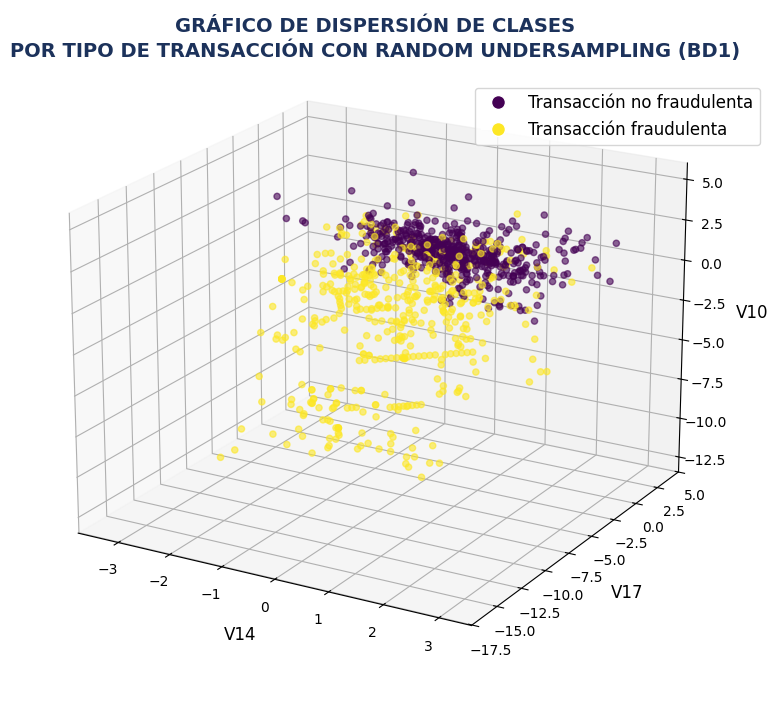

In [20]:
# VISUALIZACIÓN 3D DE LA DISTRIBUCIÓN DE CLASES EN DATOS DE TRANSACCIONES CON RUS

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(12, 9))  # Tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un eje 3D en la figura

# Usar el colormap 'viridis' para asignar colores a las clases
cmap = plt.cm.viridis  # Cargar el colormap 'viridis', que asigna colores a las clases

# Definir colores específicos para cada clase (clase 0 y clase 1)
# Usamos el color más oscuro para la clase 0 y el amarillo para la clase 1
colors = [cmap(0), cmap(0.999999)]  # Primer color para clase 0, segundo color (amarillo) para clase 1

# Crear el gráfico de dispersión 3D, asignando colores según las clases
scatter = ax.scatter(
    X_resampled.iloc[:, 13],  # Coordenada X usando la columna 14 de X_scaled
    X_resampled.iloc[:, 16],  # Coordenada Y usando la columna 17 de X_scaled
    X_resampled.iloc[:, 9],  # Coordenada Z usando la columna 10 de X_scaled
    c=y_resampled,  # Asignar colores a los puntos basados en la variable 'y' (las clases)
    cmap=plt.cm.colors.ListedColormap(colors),  # Aplicar el colormap personalizado
    alpha=0.6  # Ajustar la transparencia de los puntos
)

# Etiquetar los ejes con los nombres de las variables correspondientes
ax.set_xlabel('V14', fontsize=12, labelpad=10)  # Eje Y (columna 17)
ax.set_zlabel('V10', fontsize=12, labelpad=10)  # Eje Z (columna 10)
ax.set_ylabel('V17', fontsize=12, labelpad=10)  # Eje Z (columna 10)

# Agregar un título claro y centrado al gráfico
plt.title(
    'GRÁFICO DE DISPERSIÓN DE CLASES\nPOR TIPO DE TRANSACCIÓN CON RANDOM UNDERSAMPLING (BD1)',  # Título con salto de línea
    fontsize=14,  # Tamaño de la fuente
    fontweight='bold',  # Poner el título en negrita
    color='#1C325B',  # Color azul oscuro
    loc='center',  # Centrar el título
    y=1  # Ajustar la posición vertical del título
)

# Ajustar la perspectiva del gráfico 3D para mejorar la visualización
ax.view_init(elev=20, azim=-60)  # Elevación y ángulo de azimut del gráfico 3D

# Crear los objetos de la leyenda con los colores definidos previamente para cada clase
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10),  # Clase 0 (no fraudulenta)
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10)   # Clase 1 (fraudulenta)
]

etiq =  {0: f"Transacción no fraudulenta", 1: f"Transacción fraudulenta"}

# Asignar las etiquetas correspondientes a las clases para la leyenda
labels = [etiq[0], etiq[1]]  # 'etiq' debe contener las etiquetas de las clases (asegurarse de que esté definida)

# Colocar la leyenda en la parte superior central del gráfico
ax.legend(
    handles=handles,  # Usar los objetos creados para la leyenda
    labels=labels,  # Etiquetas de las clases
    loc='upper center',  # Ubicación de la leyenda
    fontsize=12,  # Tamaño de la fuente de la leyenda
    title_fontsize=14,  # Tamaño de la fuente del título de la leyenda
    bbox_to_anchor=(0.85, 0.9)  # Posicionar la leyenda fuera del gráfico, en la parte derecha
)

# Mostrar el gráfico generado
plt.show()

In [133]:
# GRÁFICO DE BARRAS: DISTRIBUCIÓN DE CLASES POR TIPO DE TRANSACCIÓN APLICANDO RANDOM UNDERSAMPLING

# Calcula el recuento de las clases de transacción (no fraudulenta y fraudulenta) y los ordena por índice
class_counts = trans_fraud_resampled['Class'].value_counts().sort_index()

# Extrae los valores (recuentos) de las clases
valores = class_counts.values

# Define etiquetas para las clases (0: no fraudulenta, 1: fraudulenta)
# Estas etiquetas se utilizarán en el gráfico para representar cada segmento
etiq = {0: f"Transacción no fraudulenta", 1: f"Transacción fraudulenta"}

# Crea un gráfico de barras con Plotly Express
# 'x' representa las clases, 'y' representa los recuentos, 'labels' da las etiquetas a mostrar en el gráfico
fig = px.bar(
    x=etiq.values(),  # Clases etiquetadas
    y=valores,  # Recuentos de cada clase
    labels={'x': 'Tipo de Transacción', 'y': 'Número de Transacciones'},
    title='<b>DISTRIBUCIÓN DE CLASES POR TIPO DE TRANSACCIÓN APLICANDO RANDOM UNDERSAMPLING</b>',
    color=etiq.values(),  # Usa las etiquetas para asignar colores
    color_discrete_sequence=['#FFF1DB', '#7B241C']  # Colores personalizados
)

# Ajusta el tamaño del texto en el gráfico para mejorar la visibilidad
fig.update_traces(texttemplate='%{y}', textposition='outside', textfont_size=15)

# Ajusta el diseño del gráfico
fig.update_layout(
    title={
        'text': '<b>DISTRIBUCIÓN DE CLASES POR TIPO DE TRANSACCIÓN APLICANDO RANDOM UNDERSAMPLING</b>',
        'x': 0.5,  # Centra el título horizontalmente
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Tipo de Transacción',
    yaxis_title='Número de Transacciones',
    legend={
        'x': 0.5,  # Posición horizontal de la leyenda (centrada)
        'y': -0.1,  # Posición vertical (debajo del gráfico)
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Muestra el gráfico
fig.show()

# MODELO ENSAMBLADO: **RANDOM FOREST + RUS**

In [11]:
# 'HOLDOUT METHOD' para evaluar el rendimiento de un modelo de aprendizaje automático
# Este método divide el conjunto de datos en entrenamiento y prueba con diferentes tamaños de entrenamiento
# para evaluar cómo el rendimiento del modelo varía con el tamaño del conjunto de entrenamiento.

# Definir los diferentes tamaños para el conjunto de entrenamiento
train_sizes = [0.75,0.80,0.90]

# Crear una lista para almacenar los resultados de los diferentes conjuntos de entrenamiento y prueba
split_results = []

# Para cada tamaño de entrenamiento en train_sizes
for splits in train_sizes:
  # Se divide los datos X e y en conjuntos de entrenamiento y prueba con el tamaño especificado
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=splits, random_state=42)
  split_results.append((X_train, X_test, y_train, y_test))

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para cada tamaño de entrenamiento
for i, (X_train, X_test, y_train, y_test) in enumerate(split_results):
  print(f"\033[1mConjunto con train_size={train_sizes[i]}\033[0m")
  print(f"Dimensión total es: {trans_fraud.shape}")
  print(f"X_train dimensión: {X_train.shape}, X_test dimensión: {X_test.shape}")
  print(f"y_train dimensión: {y_train.shape}, y_test dimensión: {y_test.shape}")
  print()

Conjunto con train_size=0.75
Dimensión total es: (284807, 31)
X_train dimensión: (738, 30), X_test dimensión: (246, 30)
y_train dimensión: (738,), y_test dimensión: (246,)

Conjunto con train_size=0.8
Dimensión total es: (284807, 31)
X_train dimensión: (787, 30), X_test dimensión: (197, 30)
y_train dimensión: (787,), y_test dimensión: (197,)

Conjunto con train_size=0.9
Dimensión total es: (284807, 31)
X_train dimensión: (885, 30), X_test dimensión: (99, 30)
y_train dimensión: (885,), y_test dimensión: (99,)



In [12]:
# MODELO RANDOM FOREST

# Lista para almacenar el resultado del modelo para cada conjunto de entrenamiento/prueba
models_split_results = []

# Iterar sobre los conjuntos generados
for i, (X_train, X_test, y_train, y_test) in enumerate(split_results):

  # Definir las métricas de evaluación
  scores = ["precision", "recall", "roc_auc", "f1"]

  # Mostrar información sobre el conjunto actual
  print(f"\033[1mConjunto con train_size={train_sizes[i]}:\033[0m")

  # Crear el modelo RANDOM FOREST
  modeloRF = RandomForestClassifier(
      n_jobs = -1, # Utilizar todos los núcleos disponibles para acelerar el entrenamiento
      random_state = 42 # Semilla para la reproducibilidad de los resultados
      )

  # Definir los parámetros para GridSearchCV
  grid_search = {
      "n_estimators": [10,12,14,16,18,20,50,100,200], # Número de árboles en el bosque aleatorio
      "criterion": ["gini", "entropy"], # Criterio para la selección del umbral de
      "max_features": ["sqrt","log2"], # Número máximo de características a considerar
      "max_depth": [10,20,30], # Profundidad máxima de cada
      "min_samples_split": [2,5,10], # Número mínimo de muestras requeridas para dividir un nodo interno
      "min_samples_leaf": [1,2,4] # Número mínimo de muestras requeridas en cada hoja
      }

  # Medir tiempo de ejecución
  start = pd.Timestamp.now()

  # Configuración de GridSearchCV
  grid = GridSearchCV(
      modeloRF,
      grid_search,
      cv=3, # Número de particiones en la validación cruzada
      refit=False, # No volver a entrenar el mejor modelo encontrado en toda la búsqueda
      scoring=scores, # Métricas de evaluación a usar
      verbose = 3, # Mostrar información adicional durante la búsqueda
      return_train_score=True # Devolver los resultados de entrenamiento
      )

  # Ejecutar GridSearchCV para encontrar el mejor modelo
  model_grid = grid.fit(X_train, y_train)

  # Medir tiempo de ejecución de GridSearchCV
  end = pd.Timestamp.now()
  print(f"Duración búsqueda: {end-start}")

  # Almacenar los resultados en la list 'models_split_results'
  models_split_results.append(model_grid.cv_results_)

  # Guardar modelos en un DataFrame
modelos_GSCV1= pd.DataFrame(models_split_results)

model_75 = models_split_results[0]
model_80 = models_split_results[1]
model_90 = models_split_results[2]

#75
# Crear una lista de diccionarios, donde cada diccionario corresponde a una ejecución
ajuste_modelo_75 = []

# Recorre cada índice 'i' basado en la longitud de los tiempos medios de ajuste ('mean_fit_time')
for i in range(len(model_75['mean_fit_time'])):
  # Crea un diccionario 'execution' para la ejecución actual, extrayendo el valor correspondiente al índice 'i' de cada clave en 'resultados_modelo_75'
  execution = {key: value[i] for key, value in model_75.items()}
  # Añade el diccionario de resultados de la ejecución actual a la lista 'ajuste_modelo_80'
  ajuste_modelo_75.append(execution)

# Convierte la lista de diccionarios 'ajuste_modelo_75' en un DataFrame de pandas para facilitar su manipulación y análisis
modelos_75 = pd.DataFrame(ajuste_modelo_75)
# Guarda el DataFrame resultante en un archivo Excel, permitiendo almacenar los resultados de manera estructurada
modelos_75.to_excel('C:\\Users\\mmene\\OneDrive\\Escritorio\\RESULTADOS PROYECTO\\MODELOS\\Random Forest\\credit_card_fraud_detection (BD1)\\modelos_75_RUS.xlsx')


#80
# Crear una lista de diccionarios, donde cada diccionario corresponde a una ejecución
ajuste_modelo_80 = []

# Recorre cada índice 'i' basado en la longitud de los tiempos medios de ajuste ('mean_fit_time')
for i in range(len(model_80['mean_fit_time'])):
  # Crea un diccionario 'execution' para la ejecución actual, extrayendo el valor correspondiente al índice 'i' de cada clave en 'resultados_modelo_75'
  execution = {key: value[i] for key, value in model_80.items()}
  # Añade el diccionario de resultados de la ejecución actual a la lista 'ajuste_modelo_80'
  ajuste_modelo_80.append(execution)

# Convierte la lista de diccionarios 'ajuste_modelo_80' en un DataFrame de pandas para facilitar su manipulación y análisis
modelos_80 = pd.DataFrame(ajuste_modelo_80)
# Guarda el DataFrame resultante en un archivo Excel, permitiendo almacenar los resultados de manera estructurada
modelos_80.to_excel('C:\\Users\\mmene\\OneDrive\\Escritorio\\RESULTADOS PROYECTO\\MODELOS\\Random Forest\\credit_card_fraud_detection (BD1)\\modelos_80_RUS.xlsx')


#90
# Crear una lista de diccionarios, donde cada diccionario corresponde a una ejecución
ajuste_modelo_90 = []

# Recorre cada índice 'i' basado en la longitud de los tiempos medios de ajuste ('mean_fit_time')
for i in range(len(model_90['mean_fit_time'])):
  # Crea un diccionario 'execution' para la ejecución actual, extrayendo el valor correspondiente al índice 'i' de cada clave en 'resultados_modelo_75'
  execution = {key: value[i] for key, value in model_90.items()}
  # Añade el diccionario de resultados de la ejecución actual a la lista 'ajuste_modelo_80'
  ajuste_modelo_90.append(execution)

# Convierte la lista de diccionarios 'ajuste_modelo_90' en un DataFrame de pandas para facilitar su manipulación y análisis
modelos_90 = pd.DataFrame(ajuste_modelo_90)
# Guarda el DataFrame resultante en un archivo Excel, permitiendo almacenar los resultados de manera estructurada
modelos_90.to_excel('C:\\Users\\mmene\\OneDrive\\Escritorio\\RESULTADOS PROYECTO\\MODELOS\\Random Forest\\credit_card_fraud_detection (BD1)\\modelos_90_RUS.xlsx')

Conjunto con train_size=0.75:
Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; f1: (train=0.994, test=0.959) precision: (train=1.000, test=0.983) recall: (train=0.988, test=0.935) roc_auc: (train=1.000, test=0.976) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; f1: (train=0.996, test=0.899) precision: (train=1.000, test=0.990) recall: (train=0.992, test=0.823) roc_auc: (train=1.000, test=0.950) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; f1: (train=0.994, test=0.926) precision: (train=0.996, test=0.942) recall: (train=0.992, test=0.911) roc_auc: (train=1.000, test=0.987) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1,